In [1]:
import plotly.express as px
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
from numpy import log 

In [130]:
path="/Users/louisedubois/Desktop/Consommation_electrique_2019.csv"

# Consommation éléctrique du Bitcoin en 2019 

In [7]:
import urllib.request as r
from bs4 import BeautifulSoup as bs
import json

In [9]:
url = r.urlopen("https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/pays_electricte_2019.json?token=AUPG7IHAF37VQFFTHGES6CLB2P7TA")
content = url.read()
soup = bs(content)
newDictionary=json.loads(str(soup))

HTTPError: HTTP Error 404: Not Found

In [5]:
pays_elec_json="https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/pays_electricte_2019.json"
g = open(pays_elec_json)
h = json.load(g)
pays_elec = json_normalize(h) 
#On isole le nom du pays et on supprime les colonnes inutiles
pays_elec=pays_elec.join(pays_elec['name'].str.split(',', expand=True).rename(columns={0:'A', 1:'country',2:'C',3:'D'}))
pays_elec= pays_elec.drop(['series_id', 'frequency', 'productid', 'activityid', 'iso','A','C','D','name'],axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/pays_electricte_2019.json'

In [14]:
#on récupère la consommation énérgétique du pays 
for i in range(pays_elec.shape[0]):
    pays_elec['data'].iloc[i]=pays_elec['data'].iloc[i][0]['value']
    
#on donne 0 comme valeur lorsque la consommation énergétique n'est pas un nombre pour pouvoir trier les valeurs    
for i in range(227):
    if type(pays_elec['data'].iloc[i])==int :
        pays_elec['data'].iloc[i]=float(pays_elec['data'].iloc[i])
    elif type(pays_elec['data'].iloc[i])!=float :
        pays_elec['data'].iloc[i]=0 

In [15]:
#on ajoute les valeurs du trie les valeurs 
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 73.3,'country':'Bitcoin'} , ignore_index=True).sort_values(by = 'data',ascending=False)
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 42.3,'country':'Bitcoin_inf'} , ignore_index=True).sort_values(by = 'data',ascending=False)
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 122.1,'country':'Bitcoin_sup'} , ignore_index=True).sort_values(by = 'data',ascending=False).reset_index(drop=True)


In [17]:
#on ne garde que les pays avec des consommations énergétiques comparables au bitcoin et on ajoute le bitcoin à ce df
new_pays_elec=pays_elec.iloc[30:60,:]


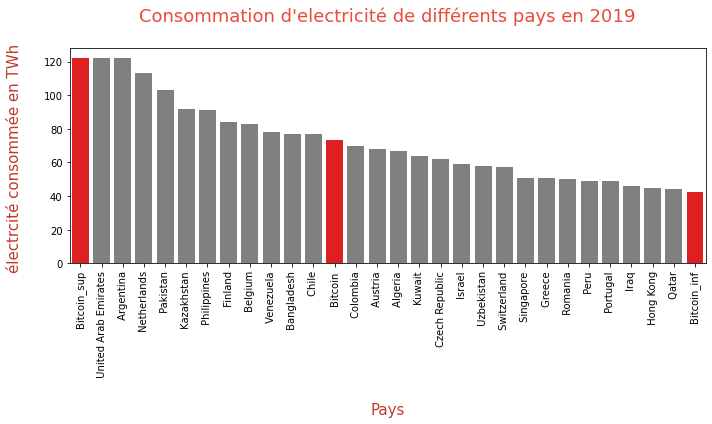

In [29]:
plt.figure(figsize=(10,6))
palette=['red' if (x=="Bitcoin_sup"or x=="Bitcoin"or x=="Bitcoin_inf" ) else 'grey' for x in new_pays_elec['country']]
sns.barplot(x=new_pays_elec['country'], y=new_pays_elec['data'], palette=palette)
plt.xlabel('\nPays', fontsize=15, color='#c0392b')
plt.ylabel("électrcité consommée en TWh \n", fontsize=15, color='#c0392b')
plt.title("Consommation d'electricité de différents pays en 2019\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation=90)
plt.tight_layout()